In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext rpy2.ipython

import ipyparallel as ipp
import matplotlib.pyplot as plt
import msprime
import numpy as np
import pandas as pd
import PIED
import toytree

from collections import Counter
from IPython.display import display, SVG

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


40

# Looking at different ways of getting time to next event
I want to know if the way I want to do it and the way odile does it are the same, so this is part of the proof.

(array([2.2821e+04, 1.7501e+04, 1.3342e+04, 1.0527e+04, 8.1670e+03,
        6.2830e+03, 4.9220e+03, 3.6850e+03, 2.8740e+03, 2.2480e+03,
        1.8310e+03, 1.3130e+03, 1.0370e+03, 7.4000e+02, 6.1900e+02,
        4.6100e+02, 3.7900e+02, 2.7800e+02, 2.2100e+02, 1.7900e+02,
        1.1500e+02, 1.0400e+02, 8.4000e+01, 6.6000e+01, 5.2000e+01,
        3.6000e+01, 2.2000e+01, 3.0000e+01, 1.1000e+01, 1.5000e+01,
        1.2000e+01, 5.0000e+00, 6.0000e+00, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.30061476e-07, 1.28483224e-02, 2.56964147e-02, 3.85445070e-02,
        5.13925993e-02, 6.42406916e-02, 7.70887839e-02, 8.99368762e-02,
        1.02784968e-01, 1.15633061e-01, 1.28481153e-01, 1.41329245e-01,
        1.54177338e-01, 1.67025430e-01, 1.79873522e-01, 1.92721615e-01,
        2.05569707e-01, 2.1841

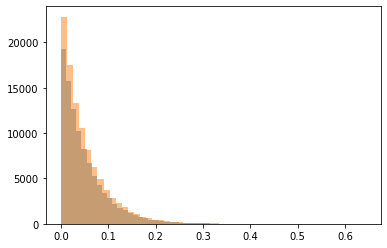

In [3]:
# These _should_ converge with large number of trials, and they do
b=1
ntips = 20
trials = 100000
t1 = []
t2 = []
for _ in range(trials):
    t1.append(np.random.exponential(1/ntips * b))
    t2.append(np.min(np.random.exponential(b, ntips)))
plt.hist(t1, alpha=0.5, bins=50)
plt.hist(t2, alpha=0.5, bins=50)

# ClaDS/PIED speciation time sampling strategy
This is the rest of the proof that PIED and ClaDS are equivalent. The figure shows the distribution of draws for next lineage to speciate based on the rates, and the code behaves identically.

(array([11806.,  8346.,  7623., 10061., 12073., 11919.,  9263., 10240.,
        10679.,  7990.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

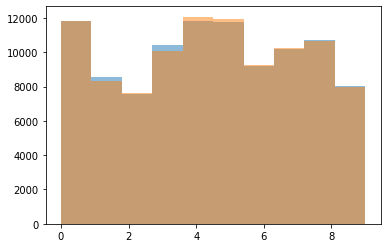

In [9]:
nsims = 100000
# "normal" bd process
#print(np.random.exponential(1/10 * 0.3, 10))
# simulated clads
lambdas = np.random.uniform(0.2, 0.4, 10)
lambdas = lambdas/np.sum(lambdas)

def expon():
    val = np.random.exponential(1/lambdas)
    min_ = np.min(val)
    idx = np.where(val == min_)[0][0]
    return idx

mins = []
for _ in range(nsims):
    idx = expon()
    mins.append(idx)
plt.hist(mins, alpha=0.5)

def cumsum():
    rand = np.random.uniform()
    cumsum = np.cumsum(lambdas)/np.sum(lambdas)
    l = len(np.where(cumsum > rand)[0])
    idx = len(lambdas)-l
    return idx

mins = []
for _ in range(nsims):
    idx = cumsum()
    mins.append(idx)
_, _, _ = plt.hist(mins, alpha=0.5)

# Maybe ClaDS is faster?
Nope

In [10]:
%timeit expon
%timeit cumsum

20.4 ns ± 0.281 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
20.1 ns ± 0.107 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Verify that np lognormal routine is parameterized the same was as rlnorm

In [8]:
print(np.random.lognormal(np.log(10), 1, 10))
%R rlnorm(10, meanlog=log(10), sdlog=1)

[12.89548523 33.49335106 20.34407528  6.15413878 15.38848545 77.27390262
  6.5272917   2.72450871  5.55910721 13.9641835 ]


array([ 10.4285489 ,   3.95874887,  13.35522422,  58.00892704,
       181.724436  ,   4.65015688,  21.38022836,   7.05199923,
         4.41982651,  25.54456241])